# Conceptual

## What is the intution behind SVMs and how do they work?

There are two basic ideas behind SVMs. The first is, that the data is tranferred into another dimensional space, using some kind of function (Kernel function), that is applied to the data. Therefore, there are some parallels to transforming a linear regression into a polynomial regression, where we also applied some function to the data.
The second idea is, that the data points should be separated using a hyperplane. This hyperplane comes with a margin that is fit to the training data points in a way that:
1. The margin is as wide as possible
2. There are as many as possible of the data points correctly classified.

Therefore, the learning algorithm make use of the data points located within the margin or on the wrong side of the hyperplane. The vectors perpendicular to the hyperplane and starting at these points are called support vectors.

These two goals are parameterized by various values, especially a cost parameter, indicating the amount of errors that are allowed to make (i.e. a data point located within the margin or on the wrong side of the hyperplane). This way SVMs are used to balance the variance-bias-tradeoff.

The hyperplane and the margin are then the decision boundary for further predictions. Each data point outside the margin would be classified with the class associated with the side of the hyperplane where this point is located. The same holds for data points located between the margin and the hyperplane. However, the confidence according to the classification shrinks the closer the point is located to the hyperplane. That's why the distance of the data point to the hyperplane matters for predicting a classification probability. The distance is measured by the vector perpendicular to the hyperplane between the data point and the hyperplane. 

## Are SVMs always robust regarding overfitting and noisy data? Discuss your answer considering aspects such as the choice of kernel and the degree of noise in the data.

They are not always robust regarding overfitting. When the parameters considered for the training, especially the cost parameter, allow to much errors and, thus, increases the amount of support-vectors used, the chance of overfitting increases as well. This is because more support-vectors result in more parameters to fit in the model. A model with more parameters is more likely to became overfitted towards the training data.

A kernel function will add some additional bias to the model, since each kernel function comes with some assumptions, i.e. using a linear kernel adds the assumtion of linearity to the data. Since additional assumptions will result in a higher bias, the chance of overfitting is given. Hence, the kernel function should be choosen wisely (or by cross-validation).

According to the noise, the impact on SVMs depends on the degree of noise and the direction of the noise. For example, noisy data that have no impact on the models choice of the support vectors, has no impact on the model at all. But when the noisy data is used as a base for support vectors, that the impact increases. SVMs can compensate with a carfully choice of tuning parameters like the cost parameter. 

# Practical

## 1. Generate data and get an overview of the data

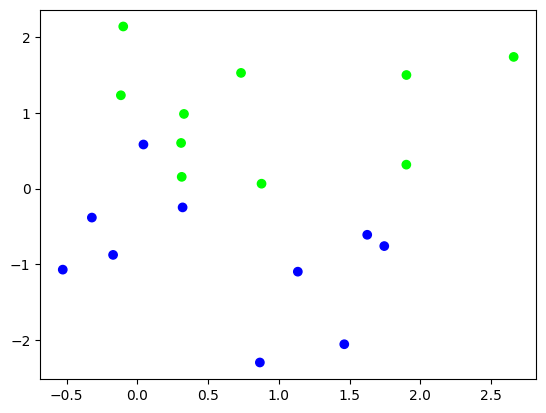

In [152]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
x = np.random.standard_normal((20,2))

y = np.array([-1]*10 + [1] * 10)
x[y==1,:] = x[y==1,:] + 1
plt.scatter(x[:,0], x[:,1], c=y, cmap='brg')
plt.show() # not linear separable

In [153]:
print(x)
print(y)

[[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]
 [ 0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069 ]
 [ 0.3190391  -0.24937038]
 [ 1.46210794 -2.06014071]
 [-0.3224172  -0.38405435]
 [ 1.13376944 -1.09989127]
 [-0.17242821 -0.87785842]
 [ 0.04221375  0.58281521]
 [-0.10061918  2.14472371]
 [ 1.90159072  1.50249434]
 [ 1.90085595  0.31627214]
 [ 0.87710977  0.06423057]
 [ 0.73211192  1.53035547]
 [ 0.30833925  0.60324647]
 [ 0.3128273   0.15479436]
 [ 0.32875387  0.9873354 ]
 [-0.11731035  1.2344157 ]
 [ 2.65980218  1.74204416]]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1]


## 2. Learn and assess an support vector (soft margin) classifier

In [154]:
import pandas as pd

df = pd.DataFrame({'x1':x[:,0],
                    'x2':x[:,1],
                    'y':y})

df

,x1,x2,y
0,1.624345,-0.611756,-1
1,-0.528172,-1.072969,-1
2,0.865408,-2.301539,-1
3,1.744812,-0.761207,-1
4,0.319039,-0.249370,-1
5,1.462108,-2.060141,-1
6,-0.322417,-0.384054,-1
7,1.133769,-1.099891,-1
8,-0.172428,-0.877858,-1
9,0.042214,0.582815,-1


coefficients: [[0.65333729 2.35330532]]
intercep: [-0.62142132]


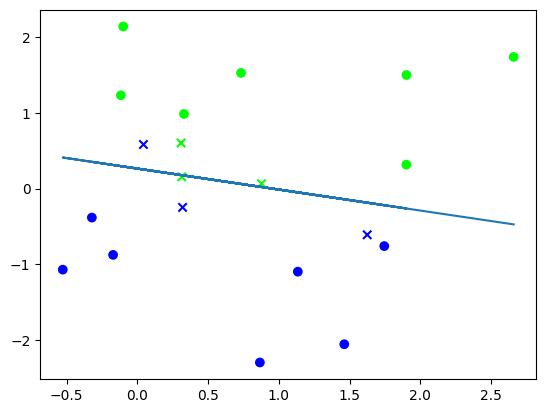

In [155]:
from sklearn.svm import SVC

X = df[['x1', 'x2']]
y = df['y']

svm = SVC(C=10.0, kernel='linear', random_state=42)
svm.fit(X,y)

print(f'coefficients: {svm.coef_}')
print(f'intercep: {svm.intercept_}')

sv_idx = svm.support_


hyperplane_function = lambda x: -svm.coef_[0,0]/svm.coef_[0,1] * x - (svm.intercept_/svm.coef_[0,1])

plt.plot(X['x1'], np.apply_along_axis(hyperplane_function, 0, x[:,0]))
plt.scatter(X[~X['x1'].index.isin(sv_idx)]['x1'], X[~X['x2'].index.isin(sv_idx)]['x2'], c=y[~y.index.isin(sv_idx)], cmap='brg', marker='o')
plt.scatter(X[X['x1'].index.isin(sv_idx)]['x1'], X[X['x2'].index.isin(sv_idx)]['x2'], c=y[y.index.isin(sv_idx)], cmap='brg', marker='x')
plt.show()

In [156]:
sv_idx.tolist()

[0, 4, 9, 13, 15, 16]

coefficients: [[0.01797572 0.76322197]]
intercep: [-0.18099982]
indeces of support vectors: [ 0  3  4  6  7  8  9 11 12 13 14 15 16 17 18]


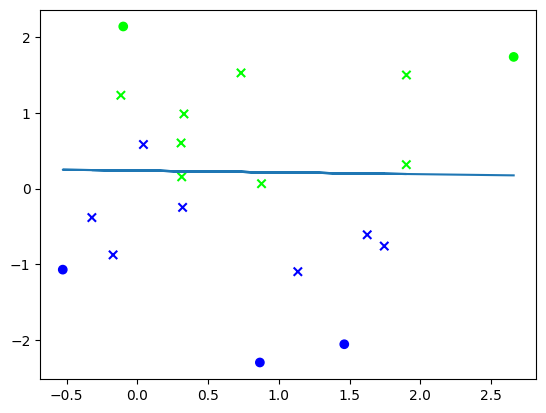

In [157]:
svm = SVC(C=0.1, kernel='linear', random_state=42)
svm.fit(X,y)

print(f'coefficients: {svm.coef_}')
print(f'intercep: {svm.intercept_}')


sv_idx = svm.support_
print(f'indeces of support vectors: {sv_idx}')


hyperplane_function = lambda x: -svm.coef_[0,0]/svm.coef_[0,1] * x - (svm.intercept_/svm.coef_[0,1])

plt.plot(X['x1'], np.apply_along_axis(hyperplane_function, 0, x[:,0]))
plt.scatter(X[~X['x1'].index.isin(sv_idx)]['x1'], X[~X['x2'].index.isin(sv_idx)]['x2'], c=y[~y.index.isin(sv_idx)], cmap='brg', marker='o')
plt.scatter(X[X['x1'].index.isin(sv_idx)]['x1'], X[X['x2'].index.isin(sv_idx)]['x2'], c=y[y.index.isin(sv_idx)], cmap='brg', marker='x')
plt.show()

### Interprete the results and the variance-bias tradeoff.

The first thing I would like to mention is, that the API of sklearn svm is couterintuitive to the theory of SVM in terms of the cost parameter C. In theory, C describes the allowed errors by constructing the margin around the hyperlane. So the higher C is, the higher the margin would be. Using the API, it turns out that it functions in the opposite direction, i.e. a lower C results in a higher margin. That's why the second model with c=0.1 comes with a wider margin compared to the first model (where C was 10).

According to the results, there are more supprot vectors used in the second model, compared to the first model. Therefore, the second model comes with a higher bias than the first one, since it considers more of the training data in the generation of the hyperplane/margin. That also means, that the second model is more likely to be overfitted and, thus, coming with a low variance according to futur predictions. However, the goodness of the models should not be evaluated by the training data, but by at least one unseen test data set.  

### Perform cross-validation to determine the cost parameter.

In [158]:
import sklearn.model_selection as skm

kfold = skm.KFold(10,random_state=0, shuffle=True)
grid = skm.GridSearchCV(svm, {'C':[0.001,0.01,0.1,0.5,1,2,3,5,10,100]}, refit=True, cv=kfold, scoring='accuracy')
grid.fit(X, y)
print(f'best params: {grid.best_params_}')
pd.DataFrame(grid.cv_results_)[['param_C', 'mean_test_score', 'rank_test_score']]

best params: {'C': 0.1}


,param_C,mean_test_score,rank_test_score
0,0.001,0.40,9
1,0.01,0.40,9
2,0.1,0.85,1
3,0.5,0.85,1
4,1,0.85,1
5,2,0.75,7
6,3,0.75,7
7,5,0.80,4
8,10,0.80,4
9,100,0.80,4


### Interprete the results.

The cross-validation shows that the best model comes with a cost parameter of 0.1 and an accuracy of 85%. So I would use this parameters to train the final model.

In [159]:
from ISLP import confusion_table

best_svm = grid.best_estimator_
np.random.seed(1)
x_test = np.random.standard_normal((20,2))

y_test = np.array([-1]*10 + [1] * 10)
x_test[y_test==1,:] = x_test[y==1,:] + 1

df_test = pd.DataFrame({'x1':x_test[:,0],
                        'x2':x_test[:,1],
                        'y':y_test})

y_test_hat = best_svm.predict(df_test[['x1', 'x2']])
confusion_table(y_test_hat , df_test['y'])

Truth,-1,1
Predicted,,
-1,9,2
1,1,8


### Interprete the results.

Checking the best model trained in cross-validatoin against the unseen test data shows that the model is quite good in making predictions on unseed data. There are just 3 misclassified cases of 20, resulting in an accurcy of 85%, like it was estimated based on the cross-validation.

## 3. Learn and assess an SVM classifier

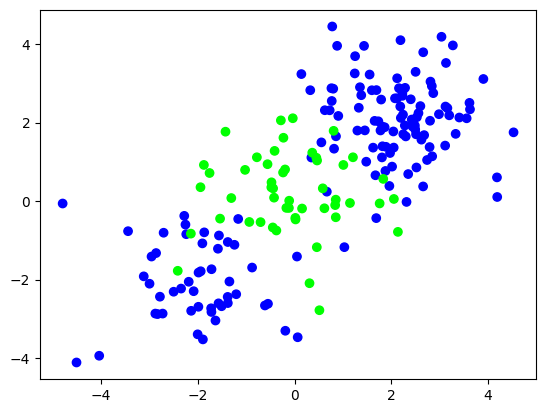

In [160]:
x_gen = np.random.standard_normal((200,2))
x_gen[0:100] = x_gen[0:100]+2
x_gen[100:150] = x_gen[100:150]-2

y_gen = np.ones((200))
y_gen[0:150] = -1

df = pd.DataFrame({'x1':x_gen[:,0],
                    'x2':x_gen[:,1],
                    'y':y_gen})
plt.scatter(df['x1'], df['x2'], c=df['y'], cmap='brg')
plt.show() # not linear separable

In [161]:
df.head(20)

,x1,x2,y
0,1.808164,1.112371,-1.0
1,1.252842,3.692455,-1.0
2,2.050808,1.363004,-1.0
3,2.190915,4.100255,-1.0
4,2.120159,2.617203,-1.0
5,2.300170,1.647750,-1.0
6,0.857482,1.650657,-1.0
7,1.791106,2.586623,-1.0
8,2.838983,2.931102,-1.0
9,2.285587,2.885141,-1.0


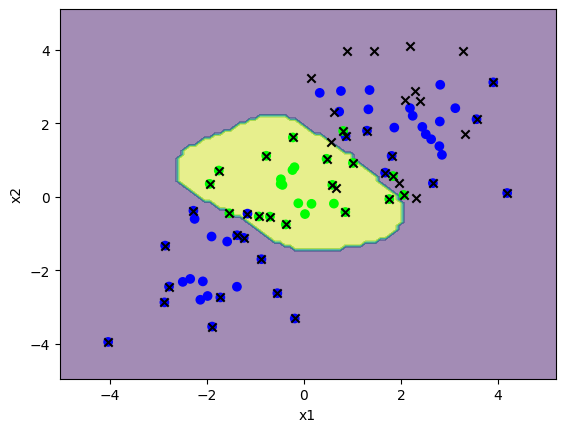

In [162]:
from sklearn.inspection import DecisionBoundaryDisplay

X_train, X_test, y_train, y_test = skm.train_test_split(df[['x1', 'x2']], df['y'], test_size=0.5, random_state=0)

svm_radial = SVC(kernel='rbf', gamma=1, C=1)
svm_radial.fit(X_train, y_train)

def plot_radial_svm(X, y, svm_radial):
    disp = DecisionBoundaryDisplay.from_estimator(svm_radial, 
                                                    X, 
                                                    response_method="predict",
                                                    xlabel=df.columns.values[0], 
                                                    ylabel=df.columns.values[1],
                                                    alpha=0.5
                                                )

    X_without_sv = X[~X.index.isin(svm_radial.support_)]
    y_without_sv = y[~y.index.isin(svm_radial.support_)]

    disp.ax_.scatter(X_without_sv['x1'], X_without_sv['x2'], c=y_without_sv, cmap='brg')
    disp.ax_.scatter(svm_radial.support_vectors_[:, 0], svm_radial.support_vectors_[:, 1], marker='x', c='black')


    plt.show()

plot_radial_svm(X_train, y_train, svm_radial)

Increase the cost parameter, to reduce the number of training errors

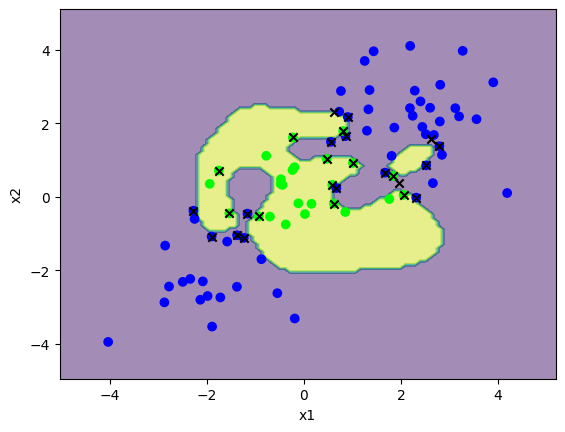

In [163]:
svm_radial = SVC(kernel='rbf', gamma=1, C=1e3)
svm_radial.fit(X_train, y_train)
plot_radial_svm(X_train, y_train, svm_radial)

In [164]:

kfold = skm.KFold(10,random_state=0, shuffle=True)
grid = skm.GridSearchCV(svm_radial, {'C':[0.001,0.01,0.1,0.5,1,2,3,5,10,100],
                                        'gamma':[0.001,0.01,0.1,0.5,1,2,3,5,10,100]}, 
                                        refit=True, 
                                        cv=kfold, 
                                        scoring='accuracy')
grid.fit(X, y)
print(f'best params: {grid.best_params_}')
print(f'best performance: {grid.best_score_}')
pd.DataFrame(grid.cv_results_)[['param_C', 'param_gamma', 'mean_test_score', 'rank_test_score']]

best params: {'C': 1, 'gamma': 1}
best performance: 0.9


,param_C,param_gamma,mean_test_score,rank_test_score
0,0.001,0.001,0.40,49
1,0.001,0.01,0.40,49
2,0.001,0.1,0.40,49
3,0.001,0.5,0.35,79
4,0.001,1,0.40,49
...,...,...,...,...
95,100,2,0.75,27
96,100,3,0.75,27
97,100,5,0.50,44
98,100,10,0.40,49


### Interprete the results.

Increasing the cost parameter leads to a model that uses less support vectors(, which, once again, is counterintuiteve related to the theory). In my case, the best performance is reached with the cost parameter of 1 and a gamma parameter of 1, resulting in a training accuracy of 90%.

In [165]:
best_svm = grid.best_estimator_

y_test_hat = best_svm.predict(X_test)
confusion_table(y_test_hat , y_test)

Truth,-1.0,1.0
Predicted,,
-1.0,8,10
1.0,67,15


### Interprete the results.

Even if the performance of the best model trained in cross-validation shows a high accuracy according to the training data, it shows a low one according to the test data. Here, we have 77 of 100 datapoints missclassified. This results in an test accuracy 23%. So this looks like overfitting. 

## 4. Learn and assess an SVM classifier for multiple classes

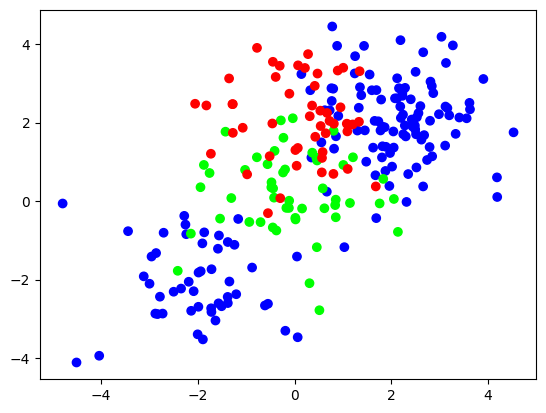

In [166]:
x_gen_mc = np.concatenate([x_gen, np.random.standard_normal((50,2))])
y_gen_mc = np.concatenate([y_gen, np.zeros((50))])
x_gen_mc[y_gen_mc==0, 1] = x_gen_mc[y_gen_mc==0, 1]+2

df = pd.DataFrame({'x1':x_gen_mc[:,0],
                    'x2':x_gen_mc[:,1],
                    'y':y_gen_mc})
plt.scatter(df['x1'], df['x2'], c=df['y'], cmap='brg')
plt.show()

In [167]:
df.head(20)

,x1,x2,y
0,1.808164,1.112371,-1.0
1,1.252842,3.692455,-1.0
2,2.050808,1.363004,-1.0
3,2.190915,4.100255,-1.0
4,2.120159,2.617203,-1.0
5,2.300170,1.647750,-1.0
6,0.857482,1.650657,-1.0
7,1.791106,2.586623,-1.0
8,2.838983,2.931102,-1.0
9,2.285587,2.885141,-1.0


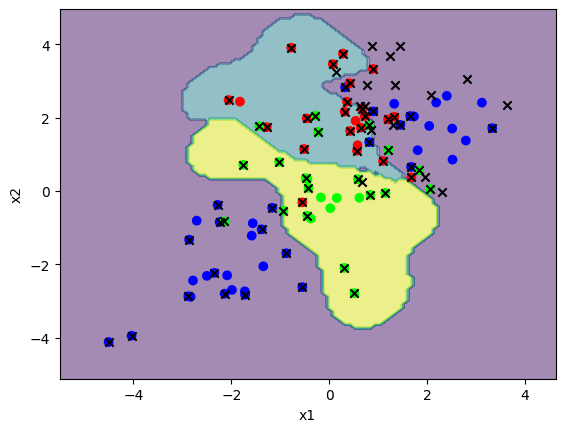

In [168]:
X_train, X_test, y_train, y_test = skm.train_test_split(df[['x1', 'x2']], df['y'], test_size=0.5, random_state=0)

svm_radial = SVC(kernel='rbf', gamma=1, C=10)
svm_radial.fit(X_train, y_train)


plot_radial_svm(X_train, y_train, svm_radial)

In [169]:

kfold = skm.KFold(10,random_state=0, shuffle=True)
grid = skm.GridSearchCV(svm_radial, {'C':[0.001,0.01,0.1,0.5,1,2,3,5,10,100],
                                        'gamma':[0.001,0.01,0.1,0.5,1,2,3,5,10,100]}, 
                                        refit=True, 
                                        cv=kfold, 
                                        scoring='accuracy')
grid.fit(X_train, y_train)
print(f'best params: {grid.best_params_}')
print(f'best performance: {grid.best_score_}')
pd.DataFrame(grid.cv_results_)[['param_C', 'param_gamma', 'mean_test_score', 'rank_test_score']]

best params: {'C': 2, 'gamma': 0.1}
best performance: 0.7980769230769231


,param_C,param_gamma,mean_test_score,rank_test_score
0,0.001,0.001,0.608974,56
1,0.001,0.01,0.608974,56
2,0.001,0.1,0.608974,56
3,0.001,0.5,0.608974,56
4,0.001,1,0.608974,56
...,...,...,...,...
95,100,2,0.664744,47
96,100,3,0.655769,50
97,100,5,0.696795,28
98,100,10,0.680128,42


In [170]:
best_svm = grid.best_estimator_

y_test_hat = best_svm.predict(X_test)
confusion_table(y_test_hat , y_test)

Truth,-1.0,0.0,1.0
Predicted,,,
-1.0,67,6,2
0.0,3,14,5
1.0,4,6,18


### Interprete the results.

The best model trained in cross-validation comes with a cost parameter of 2 and a gamma parameter of 0.1. It results in a training accuracy of 79.8%. Tested against a test dataset the model seems to be a good one, since there are just 25 of 125 datapoints missclassified, which results in a test accuracy of 80% (very close to the training accuracy.)

## 5. Apply SVM to Gene Expression Data

In [171]:
from ISLP import load_data

data_dict = load_data('Khan')
print(f'Keys: {data_dict.keys()}')

X_train, X_test, y_train, y_test = data_dict['xtrain'], data_dict['xtest'], data_dict['ytrain'], data_dict['ytest']

print(f'Training data: {X_train.shape}')
print(f'Test data: {X_test.shape}')

X_train

Keys: dict_keys(['xtest', 'xtrain', 'ytest', 'ytrain'])
Training data: (63, 2308)
Test data: (20, 2308)


,G0001,G0002,G0003,G0004,G0005,G0006,G0007,G0008,G0009,G0010,...,G2299,G2300,G2301,G2302,G2303,G2304,G2305,G2306,G2307,V2308
0,0.773344,-2.438405,-0.482562,-2.721135,-1.217058,0.827809,1.342604,0.057042,0.133569,0.565427,...,-0.238511,-0.027474,-1.660205,0.588231,-0.463624,-3.952845,-5.496768,-1.414282,-0.647600,-1.763172
1,-0.078178,-2.415754,0.412772,-2.825146,-0.626236,0.054488,1.429498,-0.120249,0.456792,0.159053,...,-0.657394,-0.246284,-0.836325,-0.571284,0.034788,-2.478130,-3.661264,-1.093923,-1.209320,-0.824395
2,-0.084469,-1.649739,-0.241308,-2.875286,-0.889405,-0.027474,1.159300,0.015676,0.191942,0.496585,...,-0.696352,0.024985,-1.059872,-0.403767,-0.678653,-2.939352,-2.736450,-1.965399,-0.805868,-1.139434
3,0.965614,-2.380547,0.625297,-1.741256,-0.845366,0.949687,1.093801,0.819736,-0.284620,0.994732,...,0.259746,0.357115,-1.893128,0.255107,0.163309,-1.021929,-2.077843,-1.127629,0.331531,-2.179483
4,0.075664,-1.728785,0.852626,0.272695,-1.841370,0.327936,1.251219,0.771450,0.030917,0.278313,...,-0.200404,0.061753,-2.273998,-0.039365,0.368801,-2.566551,-1.675044,-1.082050,-0.965218,-1.836966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,-2.683846,-2.117767,-0.523236,-2.174192,-0.448947,0.543022,1.338731,0.194250,0.599276,0.637370,...,-1.681471,-1.036765,-0.422204,-1.400799,-2.831914,-4.667046,-2.354932,-1.220102,-0.435100,-1.444771
59,-1.207646,-2.478130,0.094310,0.273456,-1.113218,-0.283690,1.105985,0.801284,0.381582,0.714811,...,-0.929629,-0.258512,-1.482365,-0.827136,-1.543182,-1.549755,-0.532730,-1.759099,0.570471,-2.232127
60,-1.684161,-2.053384,0.563835,0.314446,-2.052605,-0.630172,1.570967,0.137324,1.036985,0.973654,...,-0.537683,-0.497909,-0.477552,-1.427950,-1.928955,-2.544657,-1.080576,-1.382302,-0.804973,-1.318262
61,-2.258568,-2.308603,-1.443076,0.233094,-1.779633,-0.030665,1.532665,-0.408419,0.795162,0.376242,...,-2.276917,-0.245517,-0.815315,-1.288079,-2.835316,-2.169804,-0.630172,-0.870839,-0.315533,-1.326140


In [172]:
svm_khan = SVC(kernel='linear', gamma=1, C=10)
svm_khan.fit(X_train, y_train)

print(f'Number of vectors: {len(svm_khan.support_vectors_)}')
print(f'Number of classes: {len(svm_khan.classes_)} ({svm_khan.classes_})')

Number of vectors: 54
Number of classes: 4 ([1 2 3 4])


In [173]:
y_train_hat = svm_khan.predict(X_train)
confusion_table(y_train_hat , y_train)

Truth,1,2,3,4
Predicted,,,,
1,8,0,0,0
2,0,23,0,0
3,0,0,12,0
4,0,0,0,20


In [174]:
y_test_hat = svm_khan.predict(X_test)
confusion_table(y_test_hat , y_test)

Truth,1,2,3,4
Predicted,,,,
1,3,0,0,0
2,0,6,2,0
3,0,0,4,0
4,0,0,0,5


### Interpret the results

According to the test data this also seems to be a quite good model, since there are only 2 of 20 missclassified datapoints (accuracy of 90%). However, the whole dataset is very small and, thus, comes with a low variability. Additionally we have to consider the fact mentioned in the assignment instructions, i.e. that the number of predictors is very high in relation to the number of datapoints. To give more variability to the data, I would consider using the bootstap approach or using less predictors, like it is in random forest. 